In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.diagnostic import linear_rainbow
import statsmodels.api as sm

In [2]:
data = pd.read_csv('tips (data for regression problem).csv')
print(data.head())


   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


In [3]:
data = pd.get_dummies(data, drop_first=True)
X = data.drop('tip', axis=1)
y = data['tip']

In [4]:
#split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"Model: {model}")
    print(f"MAE: {mae}, MSE: {mse}, R²: {r2}\n")
    return mae, mse, r2

In [6]:
lin_reg = LinearRegression()
evaluate_model(lin_reg, X_train, X_test, y_train, y_test)

Model: LinearRegression()
MAE: 0.6671331480264893, MSE: 0.7033566017436106, R²: 0.43730181943482493



(0.6671331480264893, 0.7033566017436106, 0.43730181943482493)

In [7]:
ridge = Ridge(alpha=1.0)
evaluate_model(ridge, X_train, X_test, y_train, y_test)

Model: Ridge()
MAE: 0.6665379965588627, MSE: 0.7007477213216077, R²: 0.4393889716178484



(0.6665379965588627, 0.7007477213216077, 0.4393889716178484)

In [8]:
lasso = Lasso(alpha=0.1)
evaluate_model(lasso, X_train, X_test, y_train, y_test)

Model: Lasso(alpha=0.1)
MAE: 0.6374841046500827, MSE: 0.5908528649971524, R²: 0.5273068720881755



(0.6374841046500827, 0.5908528649971524, 0.5273068720881755)

In [9]:
tree = DecisionTreeRegressor(random_state=42)
evaluate_model(tree, X_train, X_test, y_train, y_test)

Model: DecisionTreeRegressor(random_state=42)
MAE: 0.8295918367346939, MSE: 1.2551938775510205, R²: -0.004178121600921791



(0.8295918367346939, 1.2551938775510205, -0.004178121600921791)

In [10]:
forest = RandomForestRegressor(n_estimators=100, random_state=42)
evaluate_model(forest, X_train, X_test, y_train, y_test)

Model: RandomForestRegressor(random_state=42)
MAE: 0.7557163265306125, MSE: 0.9196720148979602, R²: 0.2642455218065466



(0.7557163265306125, 0.9196720148979602, 0.2642455218065466)

In [11]:
svr = SVR(kernel='rbf', C=1.0, epsilon=0.1)
evaluate_model(svr, X_train, X_test, y_train, y_test)

Model: SVR()
MAE: 0.5679864502285391, MSE: 0.5323763062616395, R²: 0.5740891915042663



(0.5679864502285391, 0.5323763062616395, 0.5740891915042663)

In [12]:
knn = KNeighborsRegressor(n_neighbors=5)
evaluate_model(knn, X_train, X_test, y_train, y_test)

Model: KNeighborsRegressor()
MAE: 0.718857142857143, MSE: 0.8763725714285714, R²: 0.29888587066985495



(0.718857142857143, 0.8763725714285714, 0.29888587066985495)

In [13]:
models = [lin_reg, ridge, lasso, tree, forest, svr, knn]
for model in models:
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
    print(f"{model}: Cross-Validation R² Scores: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

LinearRegression(): Cross-Validation R² Scores: 0.4215 ± 0.1353
Ridge(): Cross-Validation R² Scores: 0.4233 ± 0.1345
Lasso(alpha=0.1): Cross-Validation R² Scores: 0.4566 ± 0.1286
DecisionTreeRegressor(random_state=42): Cross-Validation R² Scores: 0.0894 ± 0.1846
RandomForestRegressor(random_state=42): Cross-Validation R² Scores: 0.4023 ± 0.1203
SVR(): Cross-Validation R² Scores: 0.4300 ± 0.1561
KNeighborsRegressor(): Cross-Validation R² Scores: 0.2963 ± 0.1108


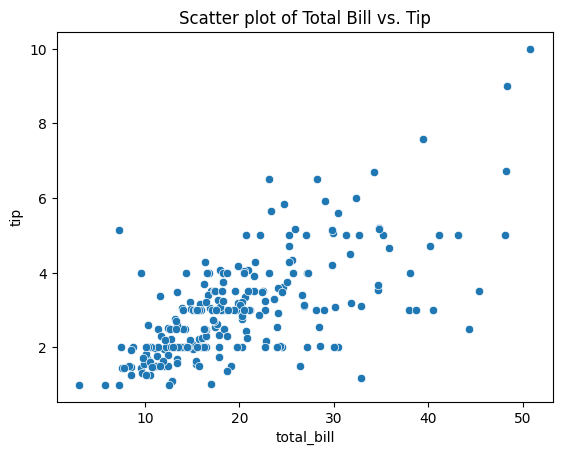

In [14]:
sns.scatterplot(data=data, x='total_bill', y='tip')
plt.title("Scatter plot of Total Bill vs. Tip")
plt.show()

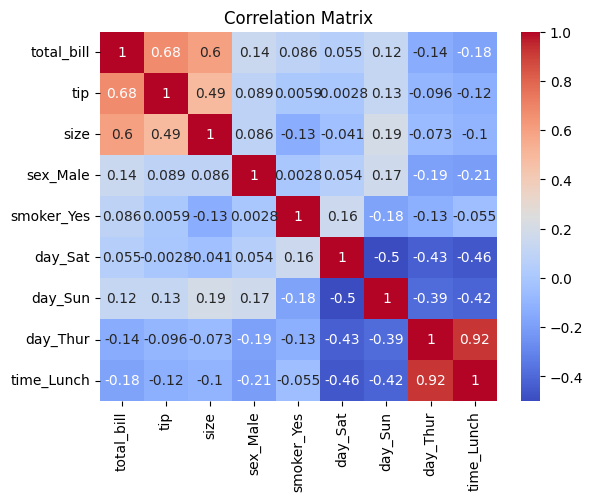

In [15]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [16]:
# For linearity, we need an initial linear regression model
X = data[['total_bill', 'size']]  # Include other numerical predictors if present
y = data['tip']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f"Rainbow test p-value: {rainbow_p_value}")

Rainbow test p-value: 0.17048935693447634


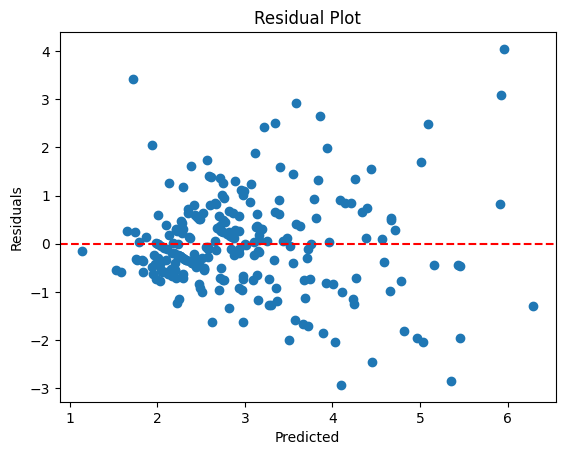

In [17]:
# Check residuals for the initial linear model
predictions = model.predict(X)
residuals = y - predictions
plt.scatter(predictions, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Residual Plot")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.show()